In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cyl_network import CylNetwork

In [3]:
# define pacemakers
pacemakers = list(range(30))
# pacemakers.extend(np.random.choice(range(20, 100), 10, replace=False))

## intact

In [226]:
ntwk = CylNetwork(num=100,
                  num_hyp=30,
                  num_ped=30,
                  gc=500,
                  tmax=800,
                  pacemakers=pacemakers,
                  lambda_d=.15,
                  wnoise=10000,
                  seed=123)

# modify pacemakers
for pm in ntwk.pacemakers:
    neuron = ntwk.neurons[pm]
    neuron.k_a = 12000
    neuron.k_e = 1000

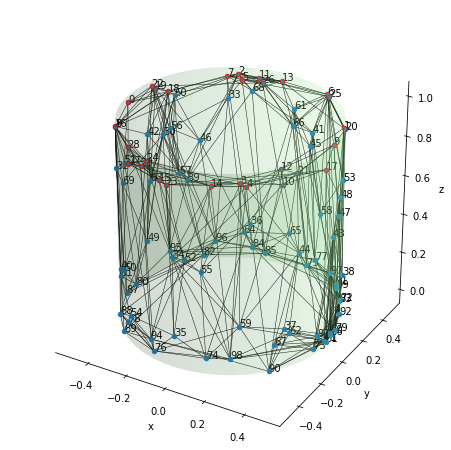

In [227]:
%matplotlib inline
ntwk.disp_network(figsize=(8,8), plot_nid=True, savepath='./output/cbnet_layout.pdf')

In [228]:
ntwk.run()

100%|█████████████████████████████████████| 79999/79999 [01:09<00:00, 1152.22it/s]


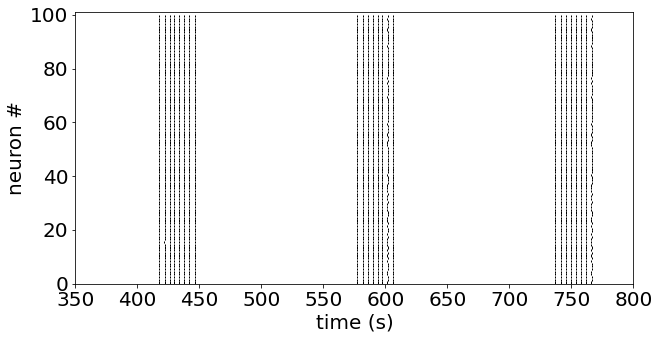

In [231]:
%matplotlib inline
ntwk.disp(figsize=(10, 5), style='spike', xlim=(350, 800), savefig='./output/cbnet_intact_trains.pdf')

## H shape

In [278]:
ntwk = CylNetwork(num=100,
                  num_hyp=30,
                  num_ped=30,
                  gc=500,
                  tmax=800,
                  pacemakers=pacemakers,
                  lambda_d=.15,
                  wnoise=10000,
                  seed=123)

# modify pacemakers
for pm in ntwk.pacemakers:
    neuron = ntwk.neurons[pm]
    neuron.k_a = 12000
    neuron.k_e = 1000

In [279]:
# cut lines

center = 0 # np.pi/2

ntwk.cut(direction='z', start=0, end=1, otherval=center)
ntwk.cut(direction='z', start=.6, end=1, otherval=np.pi+center)
ntwk.cut(direction='z', start=0, end=.4, otherval=np.pi+center)

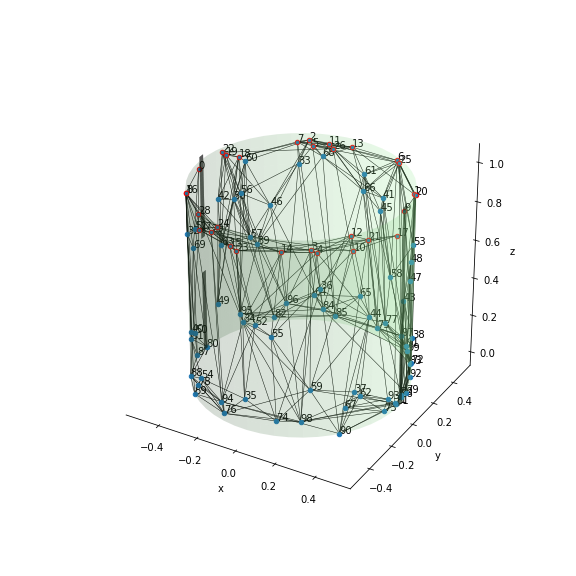

In [284]:
%matplotlib widget
ntwk.disp_network(figsize=(8,8), show_pm=True, plot_nid=True)

In [281]:
ntwk.run()

100%|█████████████████████████████████████| 79999/79999 [01:06<00:00, 1204.44it/s]


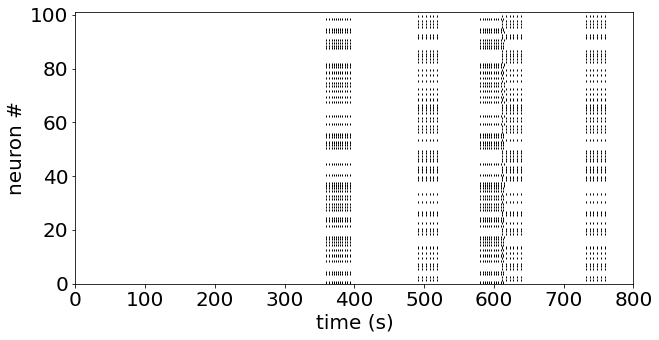

In [282]:
%matplotlib inline
ntwk.disp(figsize=(10, 5), style='spike')

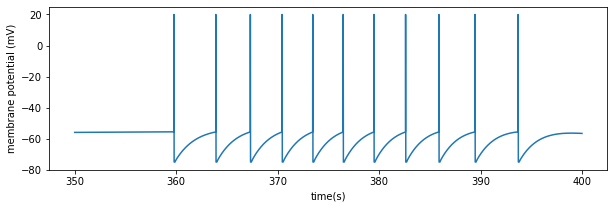

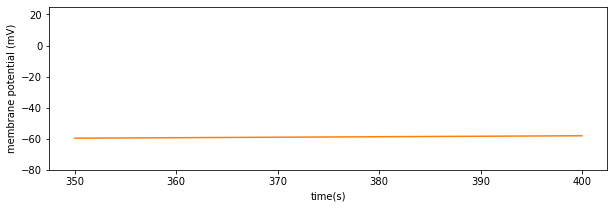

In [286]:
%matplotlib inline

xmin, xmax = 350, 400

time_axis = np.arange(xmin, xmax, ntwk.dt)

plt.figure(figsize=(10, 3))
plt.plot(time_axis, ntwk.neurons[34].v_train[int(xmin/ntwk.dt) : int(xmax/ntwk.dt)], 'C0')
plt.xlabel('time(s)')
plt.ylabel('membrane potential (mV)')
plt.ylim(-80, 25)
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(time_axis, ntwk.neurons[46].v_train[int(xmin/ntwk.dt) : int(xmax/ntwk.dt)], 'C1')
plt.xlabel('time(s)')
plt.ylabel('membrane potential (mV)')
plt.ylim(-80, 25)
plt.show()

## I shape

In [287]:
ntwk = CylNetwork(num=100,
                  num_hyp=30,
                  num_ped=30,
                  gc=500,
                  tmax=800,
                  pacemakers=pacemakers,
                  lambda_d=.15,
                  wnoise=10000,
                  seed=123)

# modify pacemakers"
for pm in ntwk.pacemakers:
    neuron = ntwk.neurons[pm]
    neuron.k_a = 12000
    neuron.k_e = 1000

In [288]:
# cut region
center = np.pi/2
width = np.pi / 20
ntwk.cut(direction='z', start=0, end=1, otherval=center)
ntwk.cut(direction='phi', start=center - np.pi + width, end=center + np.pi - width, otherval=0.5)

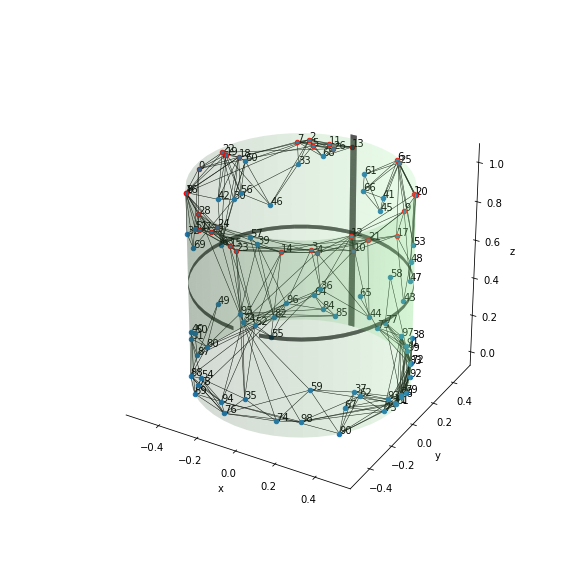

In [289]:
%matplotlib widget
ntwk.disp_network(figsize=(8,8), show_pm=True, plot_nid=True)

In [290]:
ntwk.run()

100%|█████████████████████████████████████| 79999/79999 [00:58<00:00, 1362.77it/s]


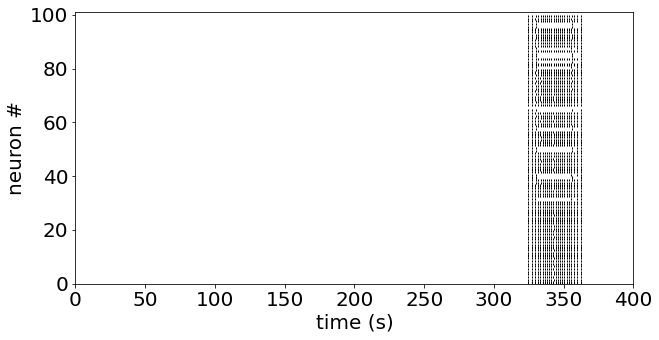

In [291]:
%matplotlib inline
ntwk.disp(figsize=(10, 5), style='spike', xlim=(0, 400))

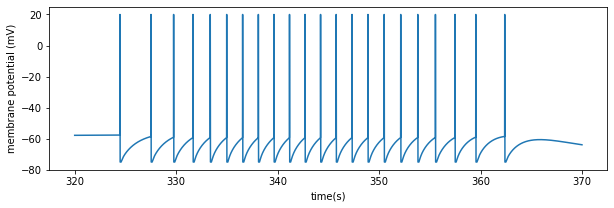

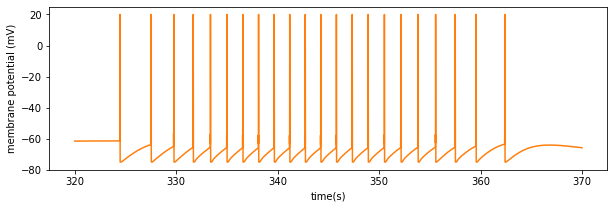

In [292]:
%matplotlib inline

xmin, xmax = 320, 370

time_axis = np.arange(xmin, xmax, ntwk.dt)

plt.figure(figsize=(10, 3))
plt.plot(time_axis, ntwk.neurons[36].v_train[int(xmin/ntwk.dt) : int(xmax/ntwk.dt)], 'C0')
plt.xlabel('time(s)')
plt.ylabel('membrane potential (mV)')
plt.ylim(-80, 25)
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(time_axis, ntwk.neurons[59].v_train[int(xmin/ntwk.dt) : int(xmax/ntwk.dt)], 'C1')
plt.xlabel('time(s)')
plt.ylabel('membrane potential (mV)')
plt.ylim(-80, 25)
plt.show()

In [271]:
ntwk.dt

0.01